In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_keras import *
from keras.datasets import cifar10

In [2]:
names_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 
              3: 'cat', 4: 'deer', 5: 'dog', 
              6: 'frog', 7: 'horse', 8: 'ship', 
              9: 'truck'}
              
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()


# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [3]:
def process(X):
    X_norm = X.reshape(len(X), X[0].size).astype(float)
    X_norm -= np.mean(X)
    X_norm /= np.std(X).astype(float)
    X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm)).astype(float)
    return X_norm

In [4]:
Xtrain_n = process(Xtrain)
Xtest_n = process(Xtest)

testdata = [Xtest_n, ytest]

print(Xtrain_n.shape, ytrain.shape)

(50000, 3073) (50000, 1)


In [7]:
reg1 = regularizers.L2(lambda_=0.01)
reg2 = regularizers.L2(lambda_=0.01)
reg3 = regularizers.L2(lambda_=0.01)

model = models.Network()

model.add(layers.Input(Xtrain_n.shape[1], reg=reg1), scale=.01)
model.add(layers.Dense(100, activation=activations.sigmoid(), reg=reg2), scale=.01)
model.add(layers.Dense(100, activation=activations.sigmoid(),reg=reg3), scale=.01)
model.add(layers.LastLayer(10, activation=activations.linear()))
model.printLayers()

Layer 0: <class 'my_keras.layers.Input'>, neurons: 3073
Layer 1: <class 'my_keras.layers.Dense'>, neurons: 100
Layer 2: <class 'my_keras.layers.Dense'>, neurons: 100
Layer 3: <class 'my_keras.layers.LastLayer'>, neurons: 10


In [25]:
model.forward(Xtrain_n[0:1])
pred = model.layers[2].S[0:1]
los = losses.MSE_img()
los(pred, ytrain[0:1])
#los.gradient(pred, ytrain[0])


-1170.3779277987928

In [8]:
loss_hist = model.fit(Xtrain_n, ytrain, loss=losses.MSE_img(), opt=optimizers.SGD(alpha=.001), 
                      metric=metrics.acc_img, testdata=testdata, epochs=50, batch_size=50)

Epoch 0, Train loss: 0.5035
 Accuracy test: 10.00
Epoch 5, Train loss: 0.4977
 Accuracy test: 10.00
Epoch 10, Train loss: 0.4931
 Accuracy test: 10.00
Epoch 15, Train loss: 0.4891
 Accuracy test: 10.00
Epoch 20, Train loss: 0.4853
 Accuracy test: 10.00
Epoch 25, Train loss: 0.4820
 Accuracy test: 10.00
Epoch 30, Train loss: 0.4790
 Accuracy test: 10.00
Epoch 35, Train loss: 0.4762
 Accuracy test: 10.00
Epoch 40, Train loss: 0.4737
 Accuracy test: 10.00
Epoch 45, Train loss: 0.4715
 Accuracy test: 10.00


In [10]:
model.predict(Xtrain_n[0:10])

array([[0.09493331, 0.09785845, 0.10150243, 0.09699781, 0.1007738 ,
        0.10294714, 0.10380126, 0.09823913, 0.09210241, 0.11043389],
       [0.09510128, 0.09788072, 0.10146531, 0.09691803, 0.10066661,
        0.10287184, 0.10368733, 0.09820423, 0.09226648, 0.11052942],
       [0.09523295, 0.0978982 , 0.10142768, 0.09684966, 0.10057506,
        0.10270891, 0.10358419, 0.09825093, 0.09247303, 0.11071541],
       [0.09490212, 0.09787126, 0.10150977, 0.09701807, 0.1007863 ,
        0.10294082, 0.10381746, 0.09823349, 0.09207687, 0.11041651],
       [0.09507587, 0.09786249, 0.10146568, 0.09692877, 0.10066808,
        0.10283344, 0.1036879 , 0.09825298, 0.09224991, 0.11058993],
       [0.09493959, 0.09786426, 0.10148174, 0.09694881, 0.10072418,
        0.10285949, 0.10376375, 0.09825296, 0.09213802, 0.11048878],
       [0.09503125, 0.09787834, 0.10151872, 0.09694522, 0.10073091,
        0.10286754, 0.1037432 , 0.09823472, 0.09217962, 0.11047038],
       [0.09500826, 0.09784347, 0.1014642

10.0 10.0


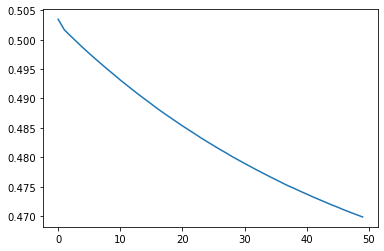

In [9]:
plt.plot(loss_hist)
print(100*metrics.acc_img(model.predict(Xtrain_n), ytrain), 
      100*metrics.acc_img(model.predict(Xtest_n), ytest))
